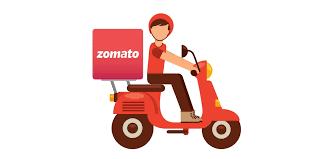

## <center><span style='color:red'> Zomato : Exploratory Data Analysis</span></center>

### 🥫Import Necessary Libraries :

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import random
from wordcloud import WordCloud
import zipfile

### 🥫Import Data :

In [13]:
with zipfile.ZipFile('zomato.zip','r') as zip_file:
    file_list = zip_file.namelist()
    file_name = 'zomato_restaurants_in_India.csv'
    for file in file_list:
        if file == file_name:
            with zip_file.open(file_name) as csv_file:
                df = pd.read_csv(csv_file)

In [25]:
df.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1


In [16]:
df.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [18]:
df.city.nunique()

99

In [19]:
df.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [22]:
df[df['city']=='Pune']

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,['Fine Dining'],https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,['Lounge'],https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,['Fine Dining'],https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,['Fine Dining'],https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,['Fine Dining'],https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,['Casual Dining'],https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,['Casual Dining'],https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1
168661,18767059,Mapro Garden,['Casual Dining'],https://www.zomato.com/pune/mapro-garden-lonav...,"3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...",Pune,5,Lonavala,18.760234,73.419775,...,2,Rs.,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.3,Very Good,143,227,0.0,-1,-1
168662,6503906,Hotel Chandralok,['Casual Dining'],https://www.zomato.com/pune/hotel-chandralok-l...,"Near Bus Stand & Post Office, Opposite Mumbai-...",Pune,5,Lonavala,18.753223,73.405655,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.3,Very Good,317,86,0.0,-1,-1


In [23]:
df.shape

(211944, 26)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
res_id,211944.0,1.349411e+07,7.883722e+06,50.0,3.301027e+06,1.869573e+07,1.881297e+07,1.915979e+07
city_id,211944.0,4.746785e+03,5.568766e+03,1.0,1.100000e+01,3.400000e+01,1.130600e+04,1.135400e+04
latitude,211944.0,2.149976e+01,2.278133e+01,0.0,1.549607e+01,2.251449e+01,2.684167e+01,1.000000e+04
longitude,211944.0,7.761528e+01,7.500104e+00,0.0,7.487796e+01,7.742597e+01,8.021932e+01,9.183277e+01
country_id,211944.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
average_cost_for_two,211944.0,5.958122e+02,6.062394e+02,0.0,2.500000e+02,4.000000e+02,7.000000e+02,3.000000e+04
price_range,211944.0,1.882535e+00,8.929891e-01,1.0,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
aggregate_rating,211944.0,3.395937e+00,1.283642e+00,0.0,3.300000e+00,3.800000e+00,4.100000e+00,4.900000e+00
votes,211944.0,3.780019e+02,9.253334e+02,-18.0,1.600000e+01,1.000000e+02,3.620000e+02,4.253900e+04
photo_count,211944.0,2.569712e+02,8.676689e+02,0.0,3.000000e+00,1.800000e+01,1.280000e+02,1.770200e+04


In [30]:
df.duplicated().sum()

151527